### Aplicação do Gradiente:

Função a ser analisada:
$$f(x) = x^2 + x + 1$$
Sua derivada:
$$\frac{df}{dx} = 2x + 1$$

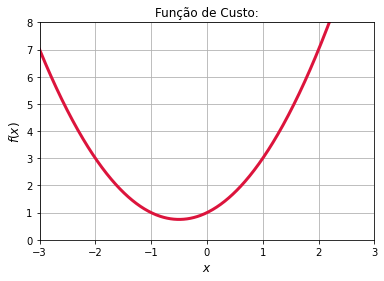

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f = lambda x: x ** 2 + x + 1 # Função de custo
df = lambda x: 2 * x + 1 # Respectiva derivada

# Plot do Gráfico da f(x) -> Função de custo
ValoresX = np.linspace(start = -3, stop = 3, num = 500)
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel(r'$x$', size = 12)
plt.ylabel(r'$f(x)$', size = 12)
plt.title("Função de Custo:")
plt.plot(ValoresX, f(ValoresX), 'crimson', linewidth = 3)
plt.grid(True)
plt.show()

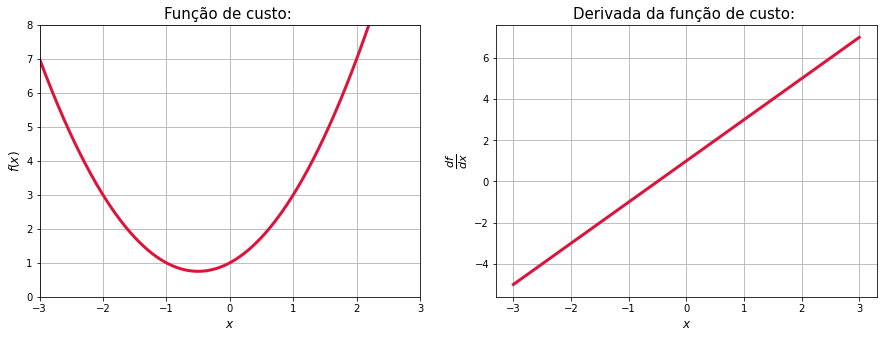

In [2]:
# Plot da f(x) e sua derivada lado a lado
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
plt.plot(ValoresX, f(ValoresX), color = 'crimson', linewidth = 3)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel(r'$x$', size = 12)
plt.ylabel(r'$f(x)$', size = 12)
plt.title("Função de custo: ", size = 15)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(ValoresX, df(ValoresX), color = 'crimson', linewidth = 3)
plt.xlabel(r'$x$', size = 12)
plt.ylabel(r'$\frac{df}{dx}$', size = 16)
plt.title("Derivada da função de custo: ", size = 15)
plt.grid(True)

plt.show()

## Loops e o Gradiente Descendente:

In [3]:
# Gradiente Descendente:
PontoPartida = 3
Anterior = 0
LearningRate = 0.1
Tol = 0.0001
x_list = [PontoPartida]
df_list = [df(PontoPartida)]
count = []

for n in range(500):
    Anterior = PontoPartida
    Gradiente = df(Anterior)
    PontoPartida = Anterior - (LearningRate * Gradiente)
    Passo = abs(PontoPartida - Anterior)
    count.append(n)
    x_list.append(PontoPartida)
    df_list.append(df(PontoPartida))

    if(Passo <= Tol):
        print("Em", n, "iterações a solução foi encontrada:")
        break

xdf = pd.DataFrame(list(zip(x_list, df_list)), columns = ['x', 'df'])
print(xdf)
print("O mínimo local ocorre em:", PontoPartida)
print("Inclinação ou df(x) neste ponto:", df(PontoPartida))
print(f"Valor de f(x) ou custo neste ponto: {f(PontoPartida)}")

Em 40 iterações a solução foi encontrada:
           x        df
0   3.000000  7.000000
1   2.300000  5.600000
2   1.740000  4.480000
3   1.292000  3.584000
4   0.933600  2.867200
5   0.646880  2.293760
6   0.417504  1.835008
7   0.234003  1.468006
8   0.087203  1.174405
9  -0.030238  0.939524
10 -0.124190  0.751619
11 -0.199352  0.601295
12 -0.259482  0.481036
13 -0.307585  0.384829
14 -0.346068  0.307863
15 -0.376855  0.246291
16 -0.401484  0.197032
17 -0.421187  0.157626
18 -0.436950  0.126101
19 -0.449560  0.100881
20 -0.459648  0.080705
21 -0.467718  0.064564
22 -0.474175  0.051651
23 -0.479340  0.041321
24 -0.483472  0.033057
25 -0.486777  0.026445
26 -0.489422  0.021156
27 -0.491538  0.016925
28 -0.493230  0.013540
29 -0.494584  0.010832
30 -0.495667  0.008666
31 -0.496534  0.006932
32 -0.497227  0.005546
33 -0.497782  0.004437
34 -0.498225  0.003549
35 -0.498580  0.002840
36 -0.498864  0.002272
37 -0.499091  0.001817
38 -0.499273  0.001454
39 -0.499418  0.001163
40 -0.499535  0

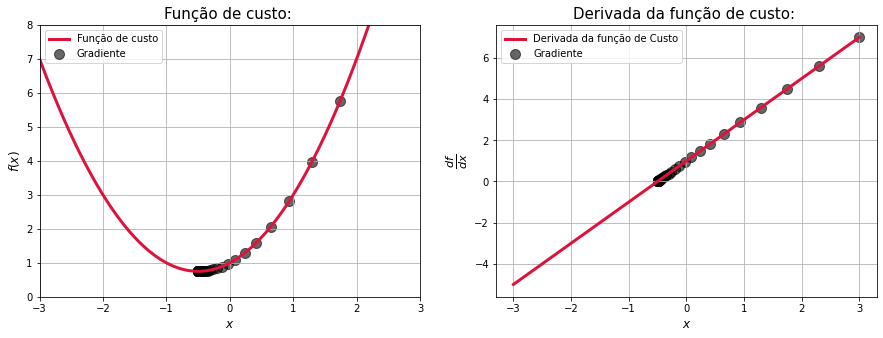

In [4]:
# Sobrepor o gradiente nos plots da função de custo e sua derivada
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
plt.plot(ValoresX, f(ValoresX), color = 'crimson', linewidth = 3, label = "Função de custo")
plt.scatter(x_list, f(np.array([x_list])), color = 'k', s = 100, alpha = 0.6, label = "Gradiente")
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel(r'$x$', size = 12)
plt.ylabel(r'$f(x)$', size = 12)
plt.title("Função de custo: ", size = 15)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(ValoresX, df(ValoresX), color = 'crimson', linewidth = 3, label = "Derivada da função de Custo")
plt.scatter(x_list, df_list, color = 'k', s = 100, alpha = 0.6, label = "Gradiente")
plt.xlabel(r'$x$', size = 12)
plt.ylabel(r'$\frac{df}{dx}$', size = 16)
plt.title("Derivada da função de custo: ", size = 15)
plt.legend()
plt.grid(True)

plt.show() 

### Trabalhando com dados e regressão linear:

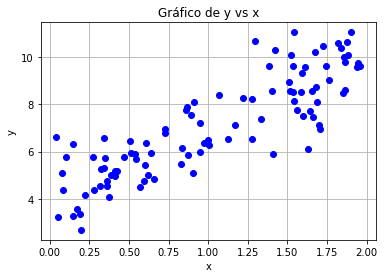

In [5]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

plt.plot(x, y, 'bo')
plt.title('Gráfico de y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [6]:
def Custo(θ, x, y):
    m = float(len(y))
    Predicao = x.dot(θ)
    Custo = (1 / 2 * m) * np.sum(np.square(Predicao - y))
    return Custo

In [7]:
def GradienteDescendente(x, y, θ, LearningRate = 0.01, Itmax = 100):
    '''
    x = Matriz de x com unidades de inclinacao adicionadas
    y = Vetor de y
    θ = Vetor de thetas np.random.randn(j, 1)
    Learning Rate
    Itmax = N° máximo de iterações
    
    Retorna o vetor θ final e o vetor do histórico de custos das iterações
    '''
    m = float(len(y))
    HistoricoCusto = np.zeros(Itmax)
    Historicoθ = []
    for i in range(Itmax):
        Predicao = np.dot(x, θ)
        θ = θ - (1 / m) * LearningRate * (x.T.dot((Predicao - y)))
        Historicoθ.append(θ.T)
        HistoricoCusto[i] = Custo(θ, x, y)
    return θ, HistoricoCusto, Historicoθ

Theta0:          3.181,
Theta1:          3.604
Custo Final/MSE:  6718.330


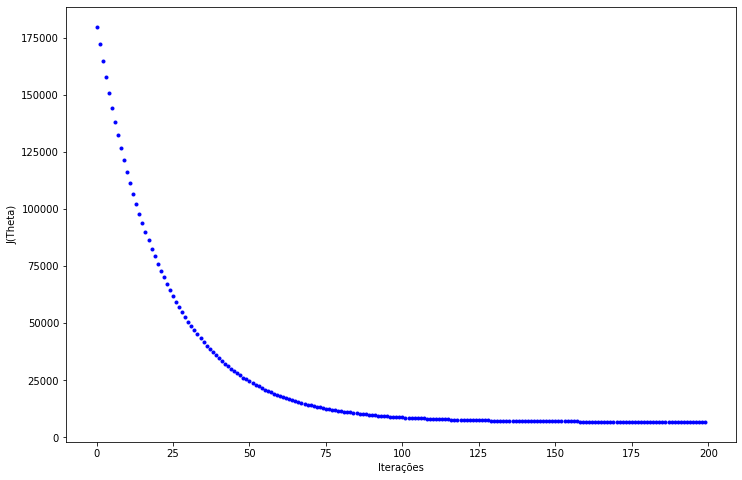

In [8]:
theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(x), 1)), x]
theta, cost_history, theta_history = GradienteDescendente(X_b,y,theta,0.01,200)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Custo Final/MSE:  {:0.3f}'.format(cost_history[-1]))

fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterações')
_=ax.plot(range(200),cost_history,'b.')

In [12]:
def plot_GD(n_iter, lr, ax,ax1 = None):
     _ = ax.plot(x,y,'b.')
     theta = np.random.randn(2, 1) # Distribuição gaussiana

     tr = 0.1
     HistCusto = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = GradienteDescendente(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        HistCusto[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(x,pred,'r-', alpha = tr)
            if(tr < 0.8):
                tr = tr + 0.2
     if(not ax1 == None):
        _ = ax1.plot(range(n_iter), HistCusto, 'b.')  

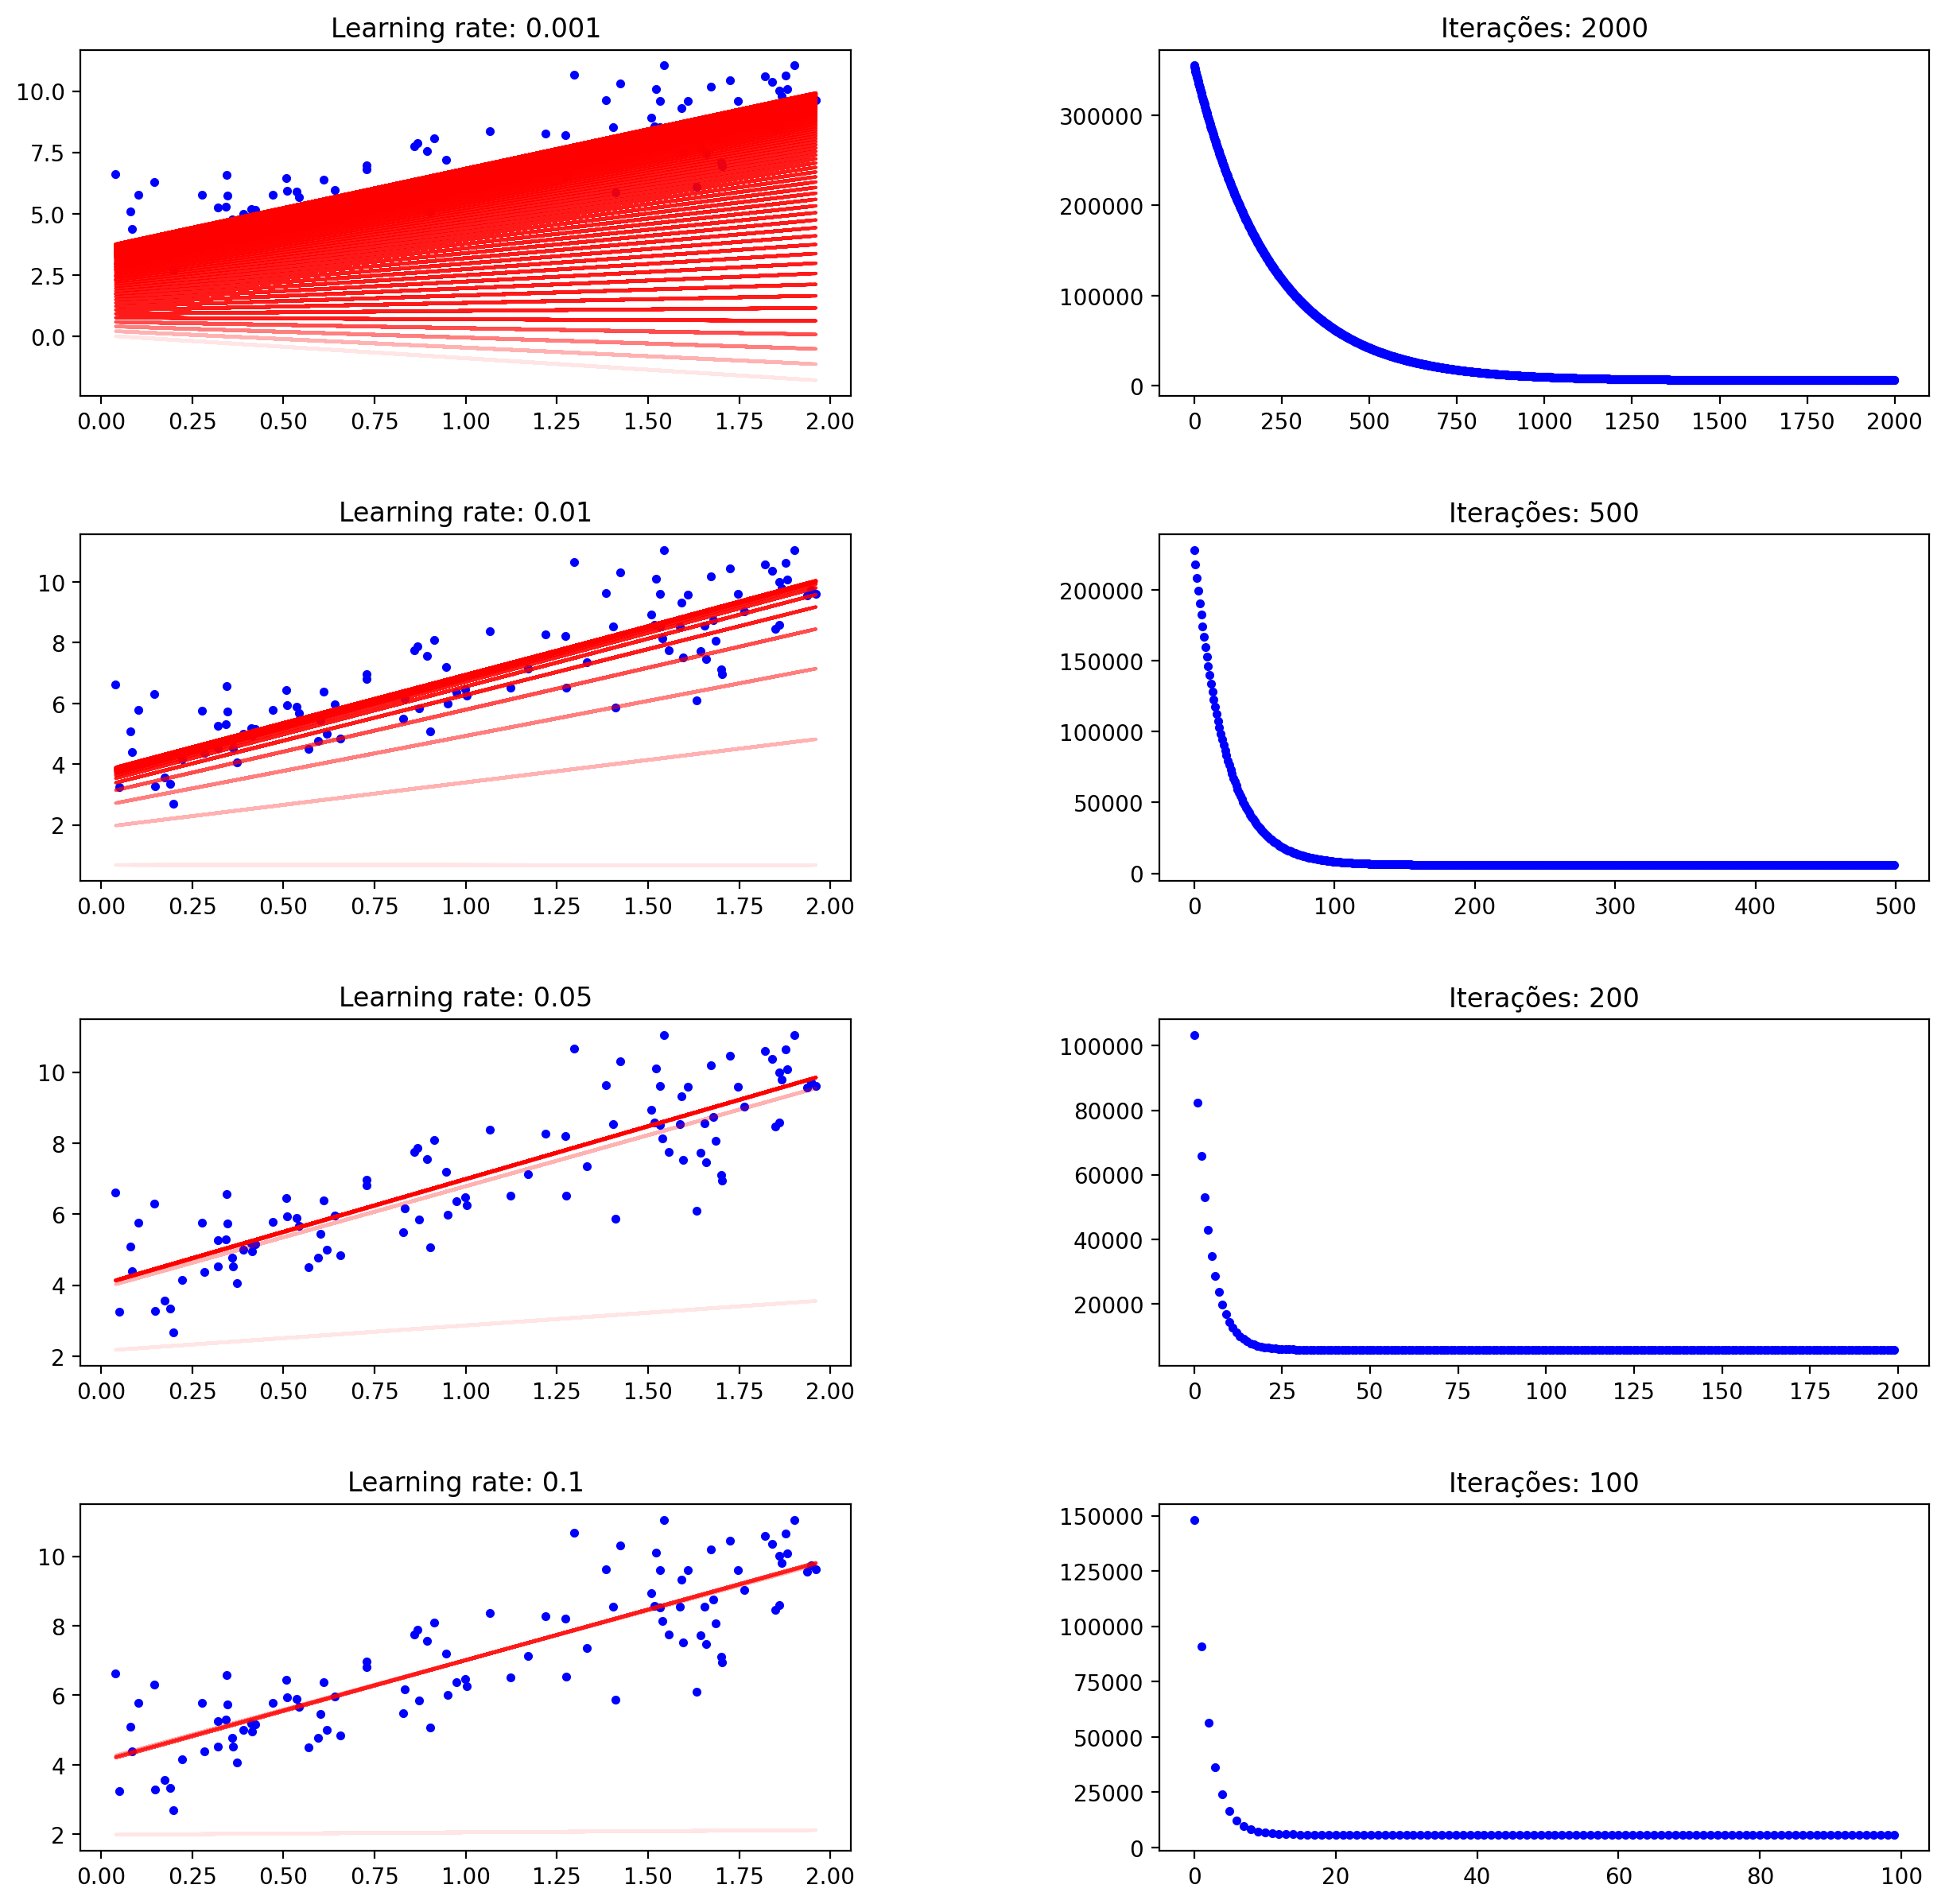

In [13]:
fig = plt.figure(figsize = (15, 15), dpi = 200)
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

it_lr = [(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("Learning rate: {}".format(lr))
    ax1.set_title("Iterações: {}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)

### Gradiente descendente estocástico:

In [19]:
def GradienteDescendenteEstocastico(x, y, theta, LearningRate = 0.01, Itmax = 10):
    m = len(y)
    HistoricoCusto = np.zeros(Itmax)
    for i in range(Itmax):
        Custo_AT = 0
        for j in range(m):
            rand_ind = np.random.randint(0, m)
            x_i = x[rand_ind, :].reshape(1, x.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            Predicao = np.dot(x_i, theta)
            theta = theta - (1 / float(m)) * LearningRate * (x_i.T.dot(Predicao - y_i))
            Custo_AT += Custo(theta, x_i, y_i)
        HistoricoCusto[i] = Custo_AT
    return theta, HistoricoCusto

### Gradiente descendente em mini-lotes:

Theta0:          6.914,
Theta1:          0.164
Final cost/MSE:  4343.425


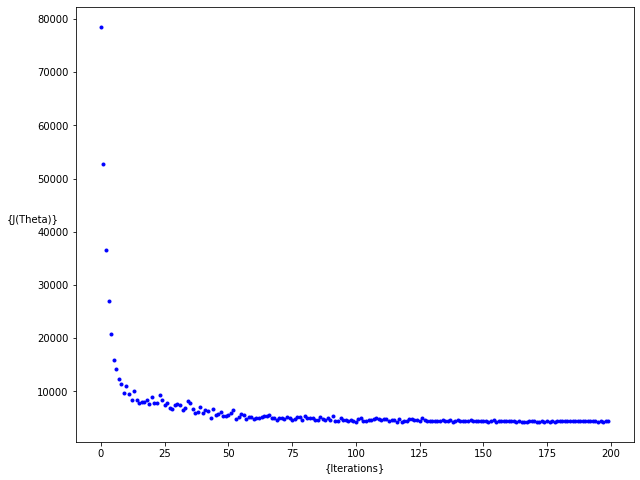

In [29]:
def GradienteDescendenteMiniLotes(x, y, theta, LearningRate = 0.01, Itmax = 10, TamLote = 20):
    m = len(y)
    HistoricoCusto = np.zeros(Itmax)
    n_lotes = int(m / TamLote)
    for i in range(Itmax):
        Custo_AT = 0
        Indices = np.random.permutation(m)
        X = x[Indices]
        y = y[Indices]
        for j in range(0, m, TamLote):
            X_i = x[j:j + TamLote]
            y_i = y[j:j + TamLote]
            X_i = np.c_[np.ones(len(X_i)), X_i]
            Predicao = np.dot(X_i, theta)
            theta = theta - (1/m) * LearningRate * (X_i.T.dot((Predicao - y_i)))
            Custo_AT += Custo(theta, X_i, y_i)
        HistoricoCusto[i] = Custo_AT
        
    return theta, HistoricoCusto

lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = GradienteDescendenteMiniLotes(x,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))



fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

